In [1]:
import matplotlib
import matplotlib.pyplot as plt
import rstoolbox
import pandas as pd
import seaborn as sns
import numpy as np

sns.set(font_scale=3)
matplotlib.rcParams['svg.fonttype'] = 'none'
sns.set_style("whitegrid")

In [2]:
# Read the fragment files
small_f = rstoolbox.io.parse_rosetta_fragments("1h4rA.picker.200.3mers")
large_f = rstoolbox.io.parse_rosetta_fragments("1h4rA.picker.200.9mers")

small_f.head()

,frame,neighbors,neighbor,position,size,aa,sse,phi,psi,omega
0,1,200,1,1,3,T,L,-121.786,147.758,-176.940
1,1,200,1,2,3,Y,E,-125.939,136.673,177.949
2,1,200,1,3,3,D,E,-86.419,120.191,-175.120
3,1,200,2,1,3,T,L,-134.990,136.167,179.406
4,1,200,2,2,3,Y,E,-126.173,155.764,164.282


In [3]:
# Add the RMSD evaluation.
# Mode 1: Quality file is None. Force to run Rosetta (procide PDB) or 
#         to check for the default naming schema (fragfile input + ".qual")
small_f = small_f.add_quality_measure(None, "1h4rA.pdb")
# Mode 2: Provide the desired fragment file
large_f = large_f.add_quality_measure("1h4rA.picker.200.9mers.qual")

small_f.head()

,frame,neighbors,neighbor,position,size,aa,sse,phi,psi,omega,rmsd
0,1,200,1,1,3,T,L,-121.786,147.758,-176.940,0.1446
1,1,200,1,2,3,Y,E,-125.939,136.673,177.949,0.1446
2,1,200,1,3,3,D,E,-86.419,120.191,-175.120,0.1446
3,1,200,2,1,3,T,L,-134.990,136.167,179.406,0.2808
4,1,200,2,2,3,Y,E,-126.173,155.764,164.282,0.2808


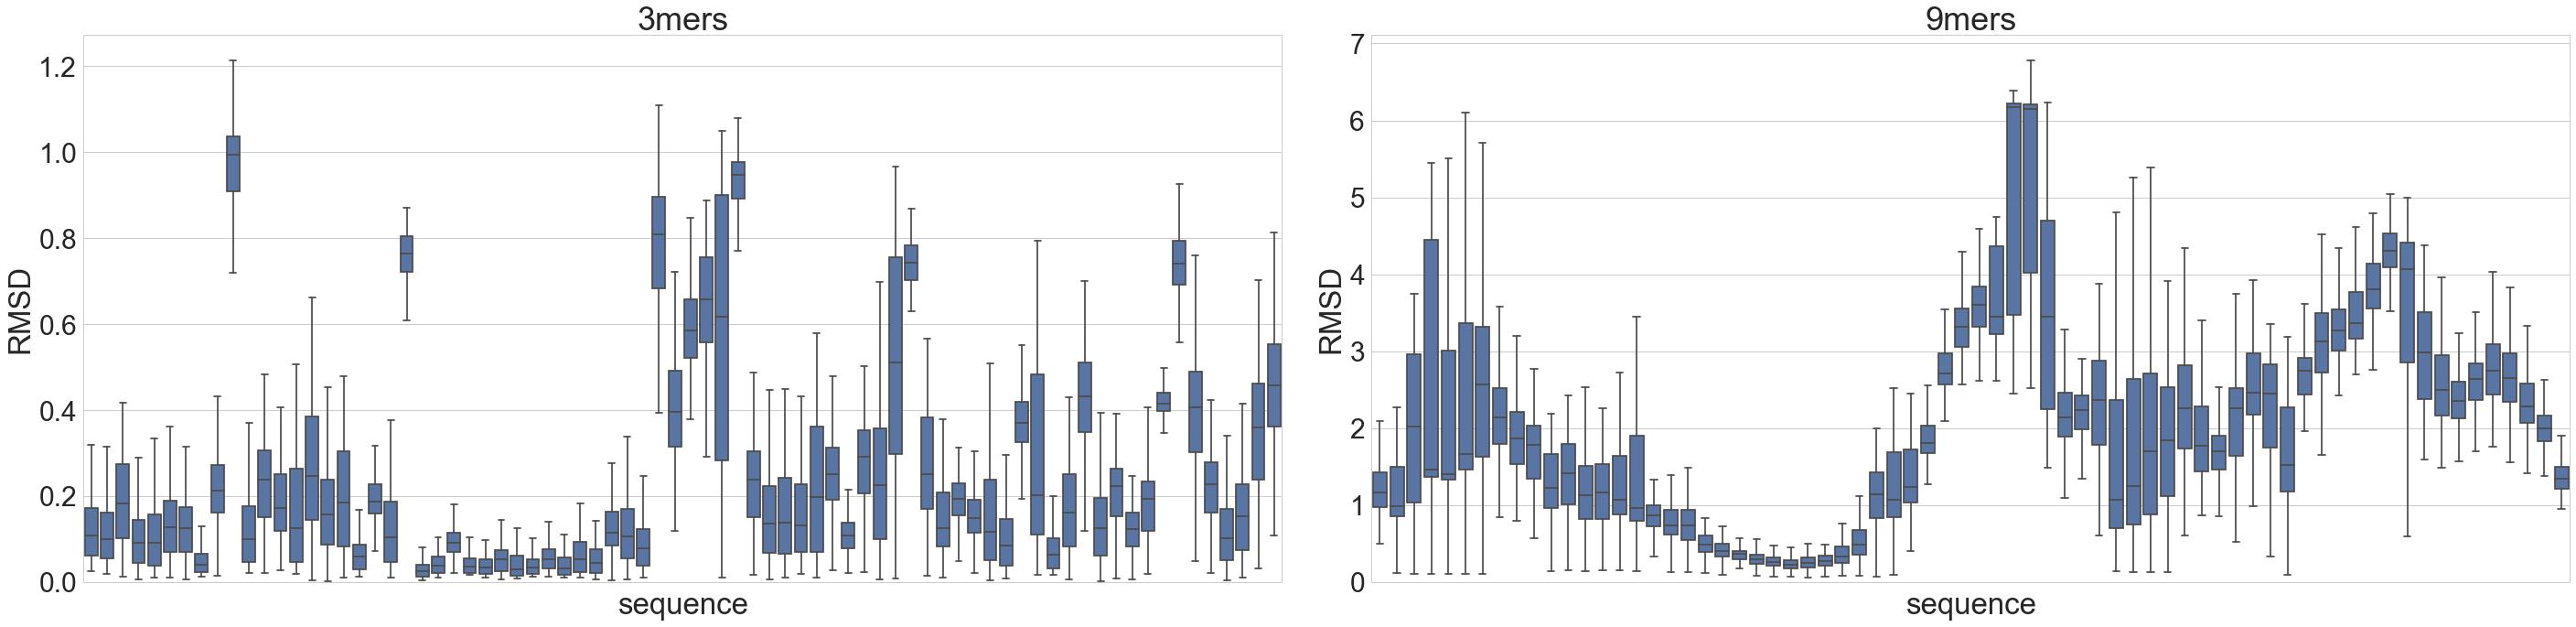

In [4]:
# Make a figure
fig  = plt.figure(figsize=(40, 10))
grid = (1, 2)
ax00 = plt.subplot2grid(grid, (0, 0))
ax01 = plt.subplot2grid(grid, (0, 1))

rstoolbox.plot.plot_fragments(small_f, large_f, small_ax=ax00, large_ax=ax01, showfliers=False)

plt.tight_layout()
plt.show()